In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)


first_row = session.query(Measurement).first()
print(first_row.__dict__)
first_row = session.query(Station).first()
print(first_row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000228DF3DB640>, 'tobs': 65.0, 'station': 'USC00519397', 'date': '2010-01-01', 'prcp': 0.08, 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000228DF3DBFD0>, 'latitude': 21.2716, 'id': 1, 'elevation': 3.0, 'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US', 'longitude': -157.8168}


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_start = session.query(Measurement.date).order_by(Measurement.date).first().date
date_start
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months


datetime.datetime(2016, 8, 23, 0, 0)

In [11]:
Prec_all = session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(Measurement.date).all()
Prec_all = pd.DataFrame(data=Prec_all,columns=("date","Precipitation"))
Prec_all

,date,Precipitation
0,2010-01-01,0.151429
1,2010-01-02,0.002857
2,2010-01-03,0.000000
3,2010-01-04,0.001429
4,2010-01-05,0.005000
...,...,...
2787,2017-08-19,0.030000
2788,2017-08-20,0.005000
2789,2017-08-21,0.193333
2790,2017-08-22,0.166667


In [12]:

# Perform a query to retrieve the data and precipitation scores
data_twelve = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
data_twelve


[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
Prec_Data = pd.DataFrame(data=data_twelve, columns=['Date','Precipitation'])
Prec_Data

,Date,Precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667
...,...,...
360,2017-08-19,0.030000
361,2017-08-20,0.005000
362,2017-08-21,0.193333
363,2017-08-22,0.166667


In [14]:
# Sort the dataframe by date
Prec_Data_sorted = Prec_Data.sort_values("Date", ascending=False)
Prec_Data_sorted

,Date,Precipitation
364,2017-08-23,0.132500
363,2017-08-22,0.166667
362,2017-08-21,0.193333
361,2017-08-20,0.005000
360,2017-08-19,0.030000
...,...,...
4,2016-08-28,0.516667
3,2016-08-27,0.064000
2,2016-08-26,0.016667
1,2016-08-25,0.077143


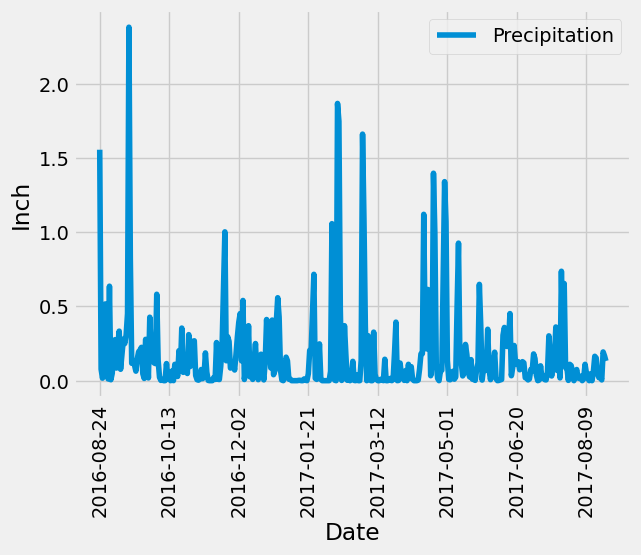

<Figure size 640x480 with 0 Axes>

In [15]:
#Prec_Data.plot(figsize=(20,8), width=3.0,color='cornflowerblue')
Prec_Data.plot(x="Date",y="Precipitation")
plt.xticks(rotation="vertical")

# Set a title for the chart
plt.xlabel("Date")
plt.ylabel("Inch")

plt.show()
plt.tight_layout()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
P_count = Prec_all["Precipitation"].count()
P_mean = Prec_all["Precipitation"].mean()
P_std = Prec_all["Precipitation"].std()
Prec_Data_Value = Prec_all ["Precipitation"]
quartiles =Prec_Data_Value.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
middleq = quartiles[0.5]
P_max = Prec_all ["Precipitation"].max()
print("    " ,"Precipitation")
print("Count", f'{ P_count:.4f}') 
print("Mean" , f'{P_mean:.4f}')
print("std"  , f'{P_std:.4f}')
print("25%"  , f'{lowerq:.4f}')
print("50%"  , f'{middleq:.4f}')
print("75%"  , f'{upperq:.4f}')
print("MAx"  , f'{P_max:.4f}')

     Precipitation
Count 2792.0000
Mean 0.1620
std 0.3457
25% 0.0100
50% 0.0583
75% 0.1736
MAx 5.9700


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_data = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station_data 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = station_data [0][0]
most_active_station = session.query( Measurement.station,func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station ==active_station).all()

most_active_station

[('USC00519281', 54.0, 71.66378066378067, 85.0)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
t_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == active_station).\
                filter(Measurement.date >= last_twelve_months).all()

tobs_df = pd.DataFrame(t_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data_twelve = session.query(Measurement.date, func.avg(Measurement.tobs)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
data_twelve = pd.DataFrame(data=data_twelve,columns=['Date','Tobs'])
data_twelve


,Date,Tobs
0,2016-08-24,77.571429
1,2016-08-25,79.428571
2,2016-08-26,80.500000
3,2016-08-27,76.833333
4,2016-08-28,76.000000
...,...,...
360,2017-08-19,78.750000
361,2017-08-20,79.666667
362,2017-08-21,79.500000
363,2017-08-22,80.000000


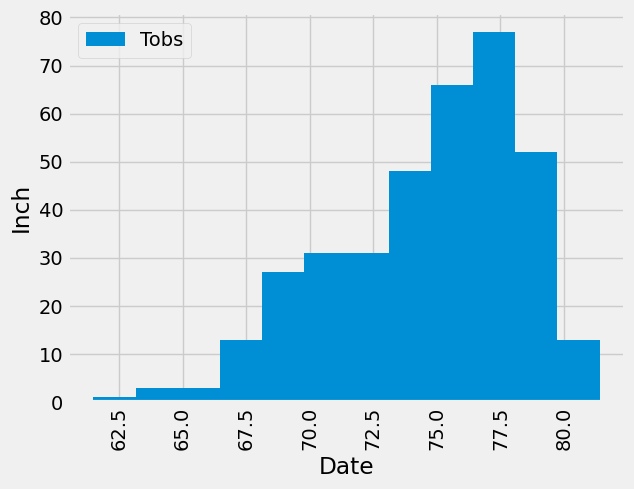

<Figure size 640x480 with 0 Axes>

In [21]:
data_twelve.plot.hist(x="Date",y="Tobs", bins=12)
plt.xticks(rotation="vertical")

# Set a title for the chart
plt.xlabel("Date")
plt.ylabel("Inch")

plt.show()
plt.tight_layout() 



# Close Session

In [22]:
# Close Session
session.close()